In [55]:
from utils import load_data, default_model, model_fit, find_outliers, plot_date
%matplotlib inline
#df = load_data('data/DAYTON_hourly.csv', max_lag=2, rolling_mean_size=None)
df = load_data('data/DEOK_hourly.csv', max_lag=None, rolling_mean_size=24)
df.head(10)

,MW,dayofweek,hour,doy,rolling_mean
dt,,,,,
2012-01-02 01:00:00,2836.0,0,1,2,2636.250000
2012-01-02 02:00:00,2581.0,0,2,2,2648.875000
2012-01-02 03:00:00,2516.0,0,3,2,2653.708333
2012-01-02 04:00:00,2520.0,0,4,2,2660.041667
2012-01-02 05:00:00,2528.0,0,5,2,2668.666667
2012-01-02 06:00:00,2684.0,0,6,2,2679.041667
2012-01-02 07:00:00,2737.0,0,7,2,2696.333333
2012-01-02 08:00:00,2960.0,0,8,2,2714.375000
2012-01-02 09:00:00,3050.0,0,9,2,2740.000000


Train MAPE: 0.03827769186244009
Test MAPE: 0.050669006534006696


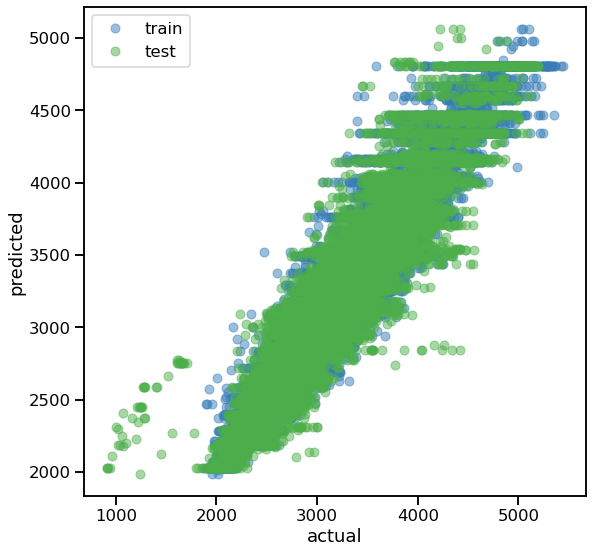

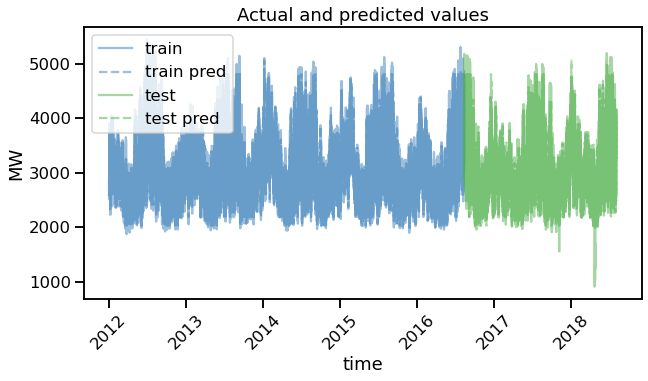

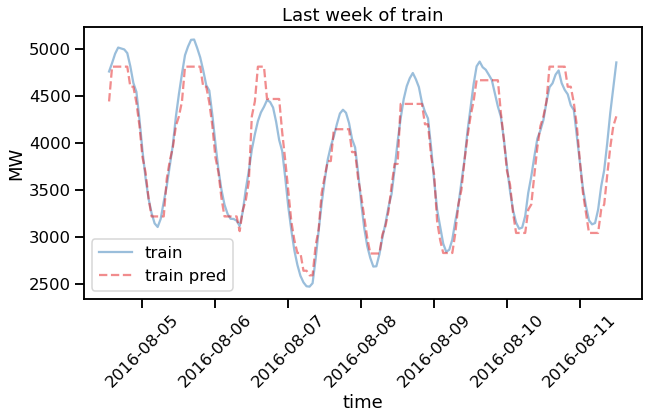

In [56]:
model, df_fit = model_fit(df, default_model,  test_size=0.3, visualize=True)

In [57]:
[print(x, ':', y) for x,y in zip(default_model.feature_names_in_, model.feature_importances_)]

dayofweek : 0.030702198893927512
hour : 0.3557080644311579
doy : 0.06331173047858824
rolling_mean : 0.5502780061963264


[None, None, None, None]

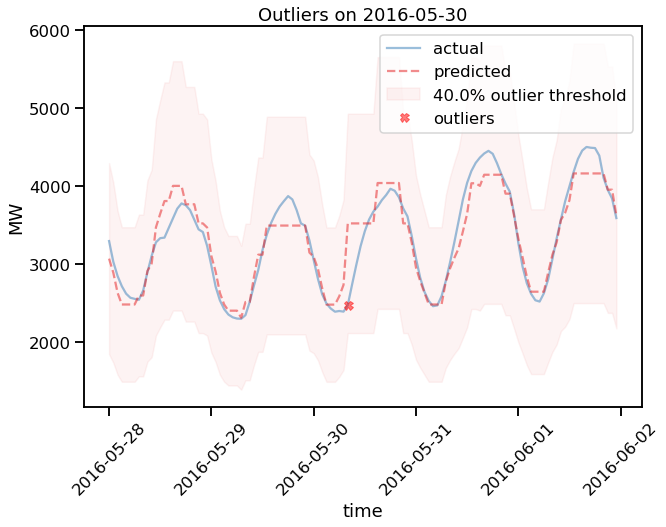

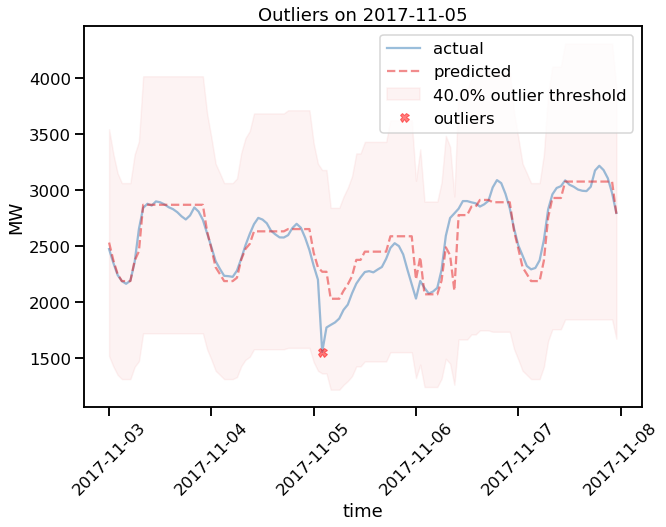

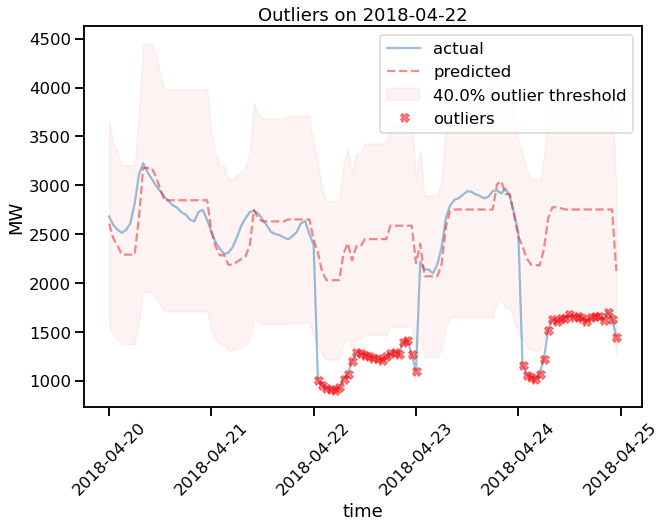

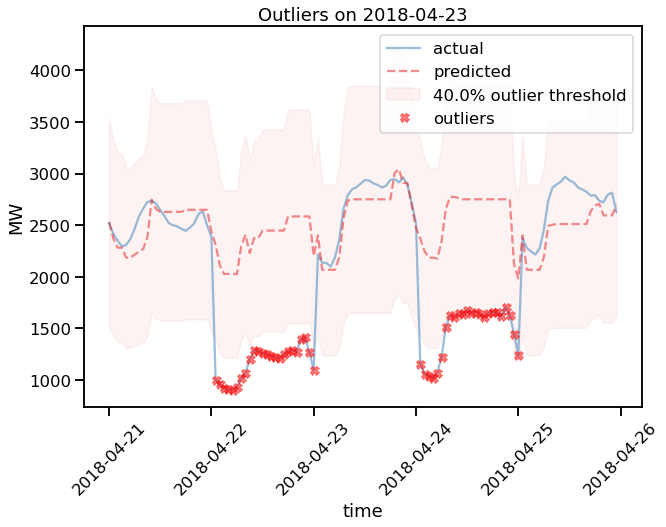

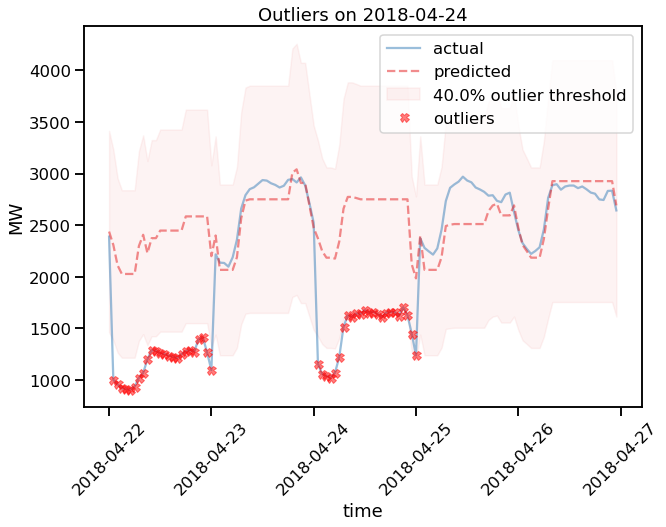

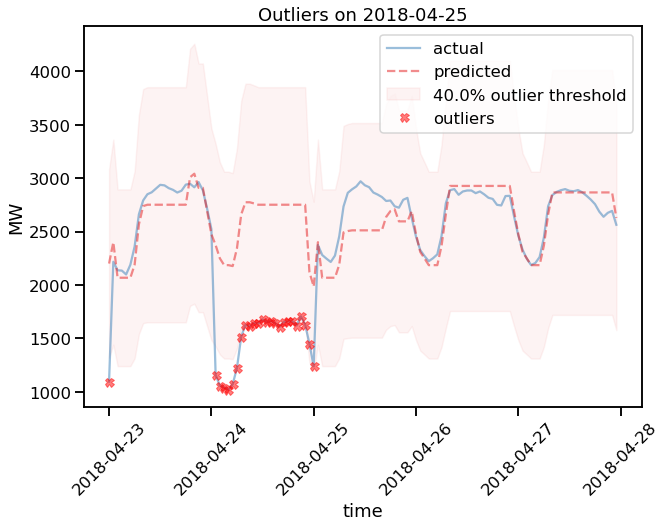

,MW,dayofweek,hour,doy,rolling_mean,pred,train,relative_error
dt,,,,,,,,
2018-04-23 00:00:00,1096.0,0,0,113,1219.000000,2201.000000,False,-1.008212
2018-04-24 01:00:00,1158.0,1,1,114,2688.625000,2372.890805,False,-1.049129
2018-04-24 02:00:00,1057.0,1,2,114,2644.458333,2249.181102,False,-1.127891
2018-04-24 03:00:00,1039.0,1,3,114,2599.416667,2186.130890,False,-1.104072
2018-04-24 04:00:00,1020.0,1,4,114,2553.750000,2186.130890,False,-1.143266
2018-04-24 05:00:00,1071.0,1,5,114,2508.791667,2177.348315,False,-1.033005
2018-04-24 06:00:00,1223.0,1,6,114,2462.166667,2342.750000,False,-0.915576
2018-04-24 07:00:00,1516.0,1,7,114,2414.750000,2660.392157,False,-0.754876
2018-04-24 08:00:00,1628.0,1,8,114,2367.000000,2774.857143,False,-0.704458


In [58]:
find_outliers(df_fit, threshold = 0.4)

In [41]:
#plot_date(df_fit, '2008-10-20', 3)